In [4]:
import pandas as pd
import os

# Folder containing the CSVs
data_path = '../data/yfinance_data'

# List of tickers you want to load
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Dictionary to hold each ticker's DataFrame
stock_data = {}

# Loop through each ticker and load its CSV
for ticker in tickers:
    file_path = os.path.join(data_path, f"{ticker}_historical_data.csv")
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    stock_data[ticker] = df

    
# preview head of each
stock_data['AAPL'].head()



,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [16]:
import yfinance as yf

# Example for AAPL
aapl = yf.Ticker('AAPL')

# Fetch financial data
financials = aapl.financials
print(financials)

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

In [17]:
import yfinance as yf

# List of tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Dictionary to hold financial data
financial_data = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    financial_data[ticker] = {
        'financials': stock.financials,
        'balance_sheet': stock.balance_sheet,
        'cash_flow': stock.cashflow,
        'info': stock.info
    }

## Analyze Relationships

In this step, we analyze how stock prices relate to financial metrics like total revenue.

1. **Plotting Function**: We create a function to plot stock prices and total revenue for each ticker.
  
2. **Data Alignment**: We align financial data with stock prices by date to ensure accurate comparisons.

3. **Visualization**: We use Matplotlib to create a graph showing:
   - **Close Price** (in blue)
   - **Total Revenue** (in orange)

4. **Iterate Through Tickers**: We loop through each ticker to generate these plots.

This helps us see trends and relationships between financial performance and stock prices.

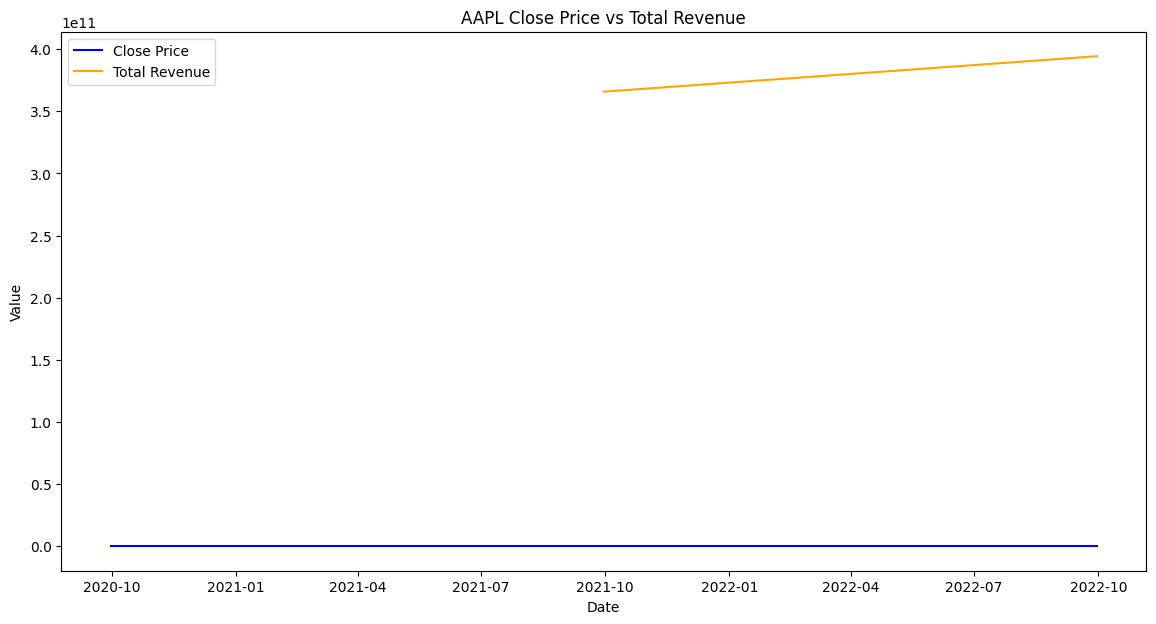

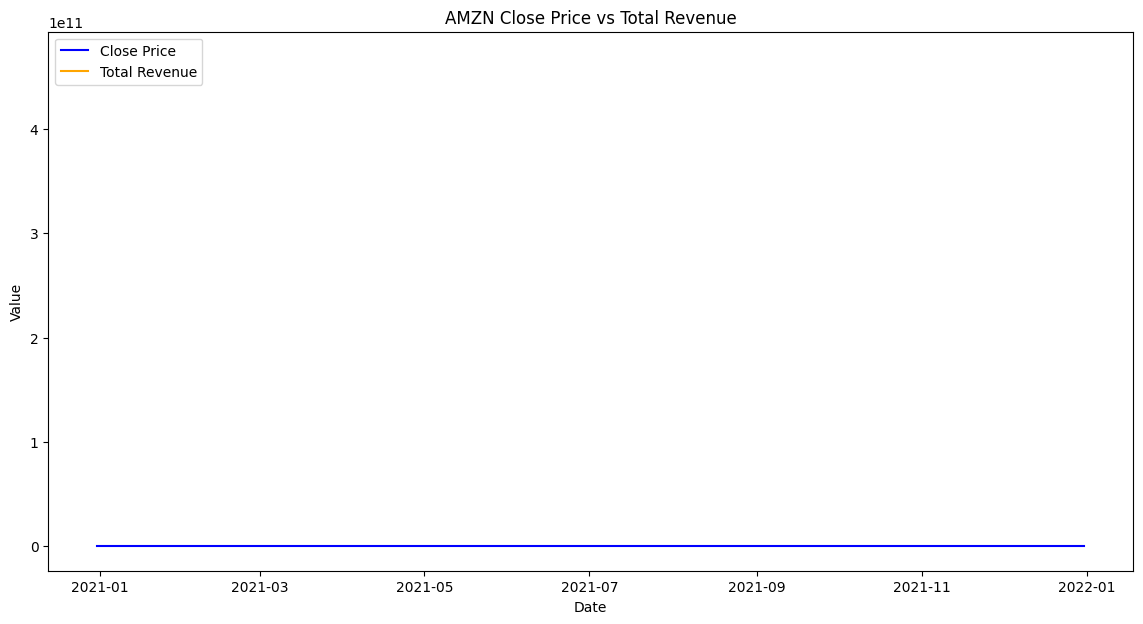

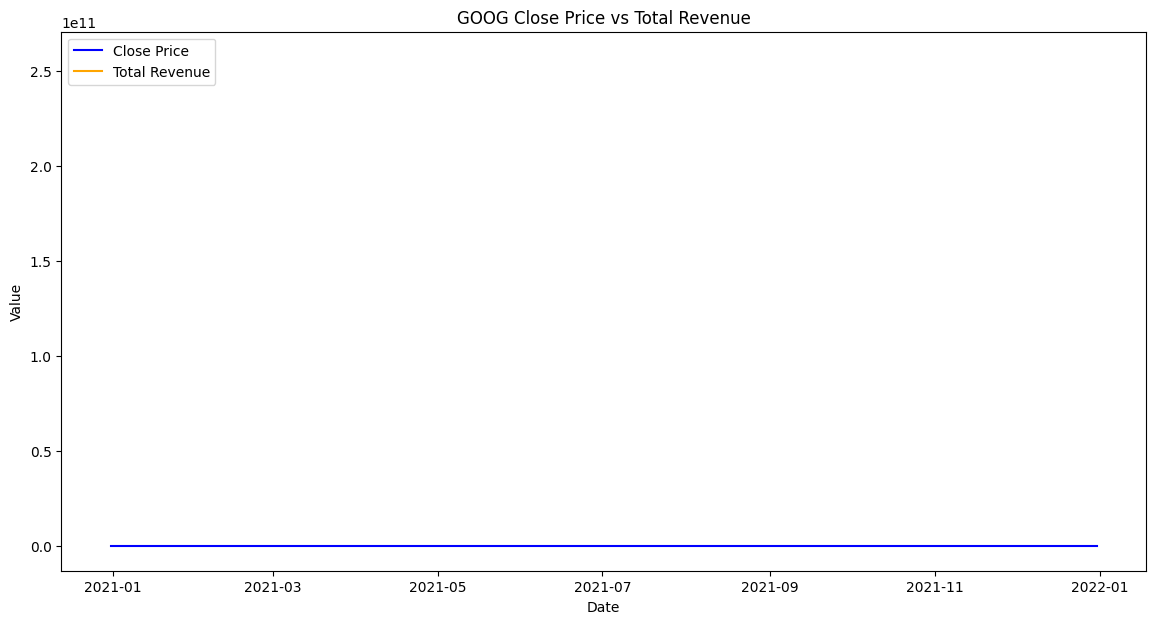

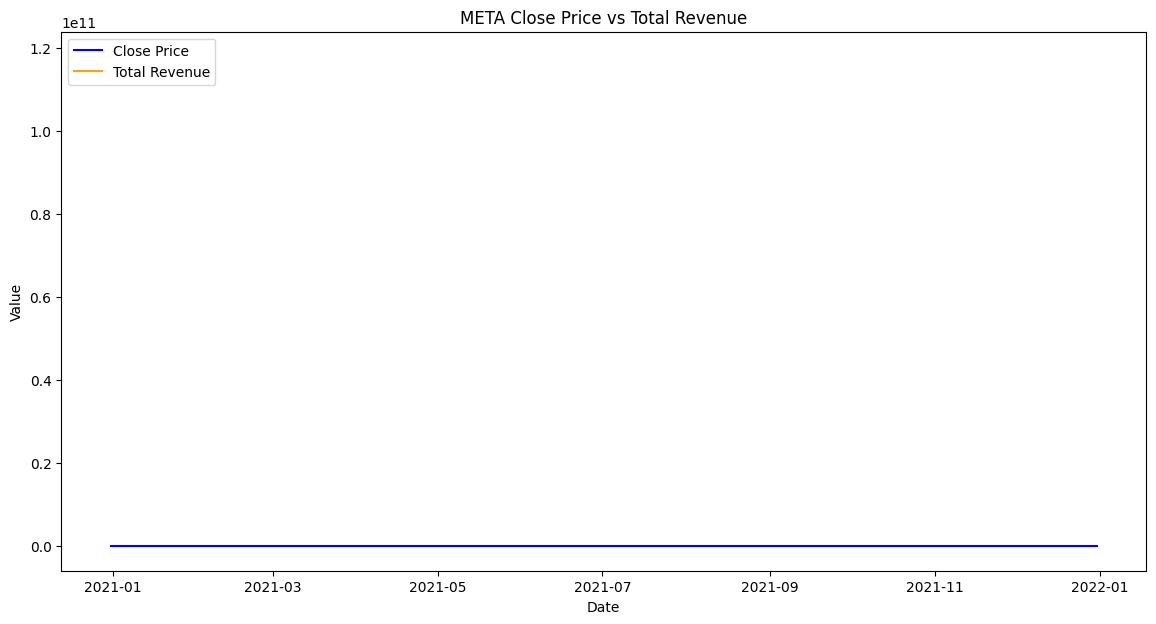

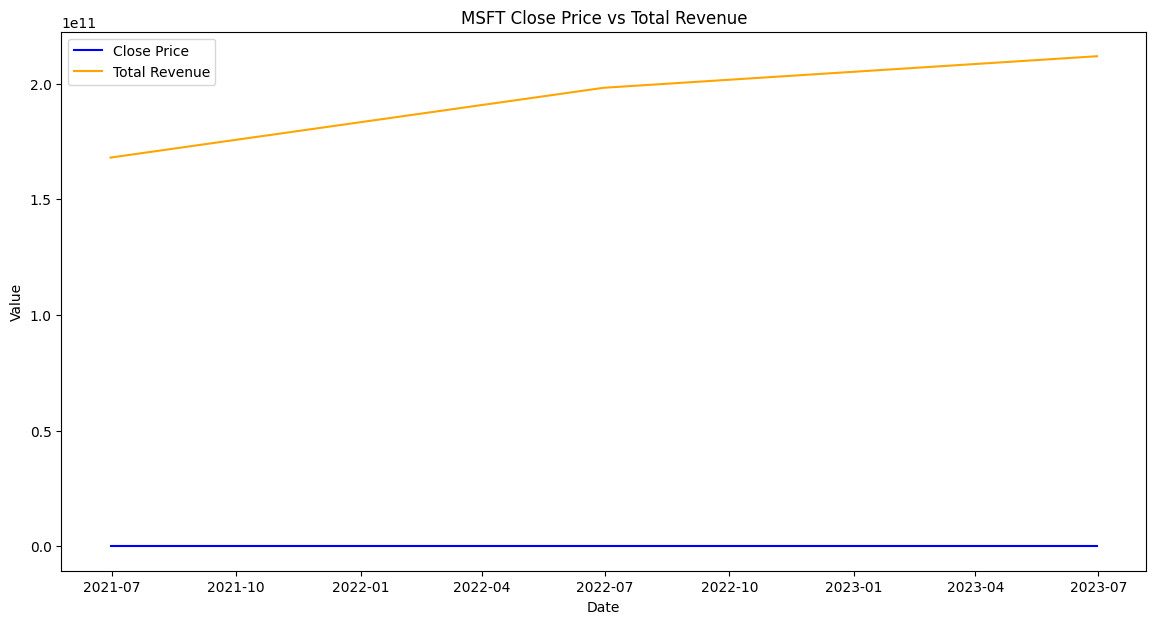

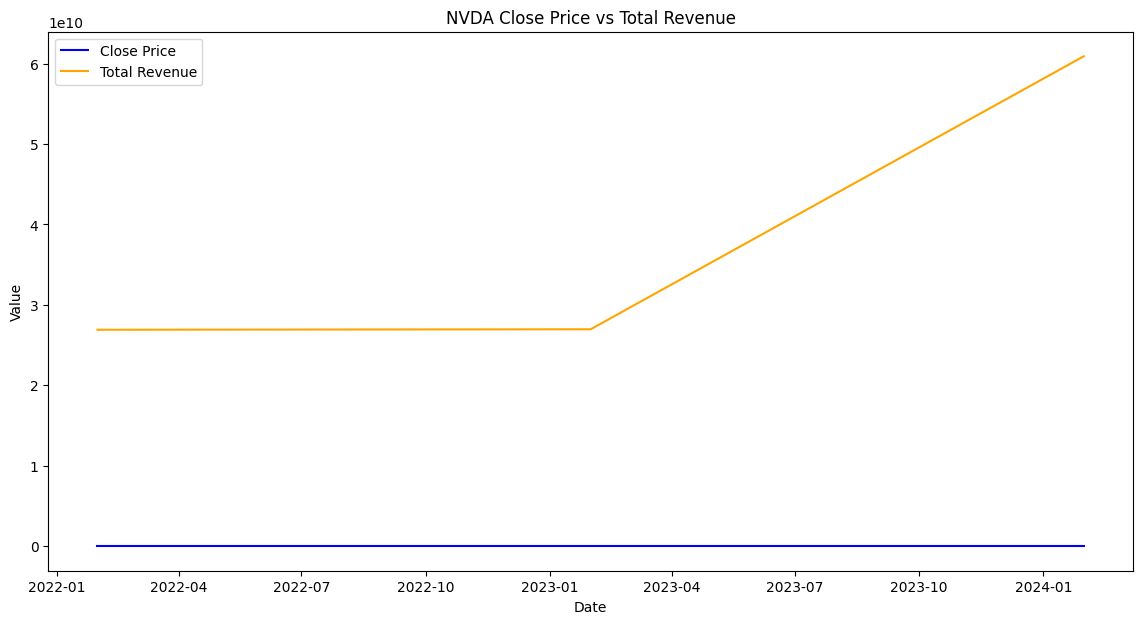

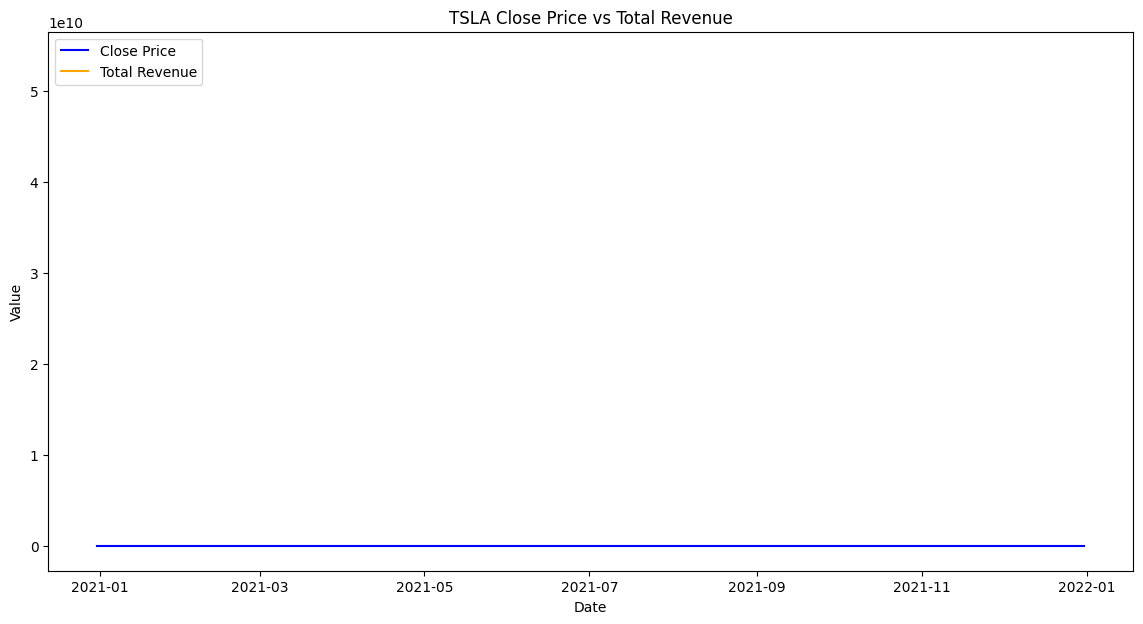

In [18]:
import matplotlib.pyplot as plt

def plot_financials_vs_price(ticker, stock_data):
    financials = financial_data[ticker]['financials']
    stock_prices = stock_data[ticker]

    # Ensure the metrics are aligned by date
    financials = financials.T  # Transpose for easier access
    financials.index = pd.to_datetime(financials.index)  # Ensure index is datetime

    # Merge the financials with the stock data
    merged_data = stock_prices[['Close']].join(financials[['Total Revenue']], how='inner')

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(merged_data['Close'], label='Close Price', color='blue')
    plt.plot(merged_data['Total Revenue'], label='Total Revenue', color='orange')
    plt.title(f'{ticker} Close Price vs Total Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Loop through each ticker to generate plots
for ticker in tickers:
    plot_financials_vs_price(ticker, stock_data)